# Fictive Temperature Analysis
## An example of using the `fictive_temp_functions` code

> To Do: 
> * Make it a package
> * Convert to Cp
> * Add enthalpy calculation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_parser import parse_mettler_dsc_txt_file, extract_T_and_dsc
from fictive_temp_functions import baseline_correction, fictive_temperature

In [2]:
path = "Data/OTP ag-46.5ºC (real-36.5) 0.1-1260ks -90,70ºC 1000Ks-1 181224.txt"

# parse results from raw file
results = parse_mettler_dsc_txt_file(path)

### Data Requirements: 

The `baseline_correction` and `fictive_temperature` functions expect individual sample data to come in the form of a dictionary containing only temperature and heat-flow data as numpy arrays, keyed by `T` and `dsc`, respectively.

In [3]:
# get only necessary data for analysis
data = extract_T_and_dsc(results)

# define sample and refernce data
sample = data[7]
ref = data[21]

print(sample)

{'T': array([-70.426, -70.325, -70.228, ...,  59.941,  60.038,  60.138],
      shape=(1304,)), 'dsc': array([0.0228774, 0.0228891, 0.0228894, ..., 0.0527233, 0.0527206,
       0.0526805], shape=(1304,))}


## Using the `baseline_correction` function

> To do: describe how it works

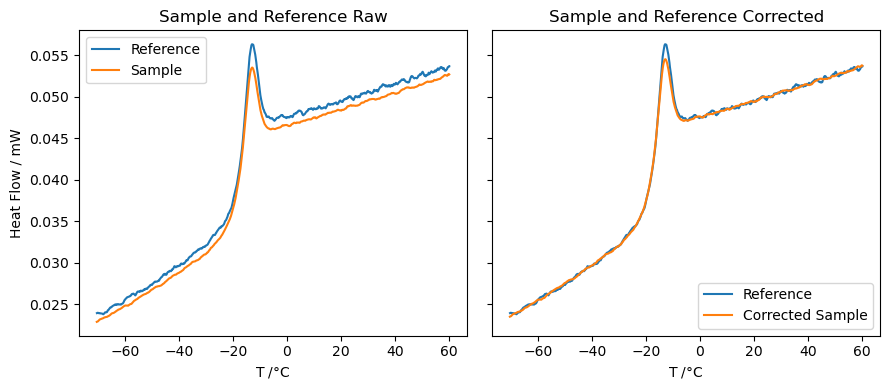

In [4]:
# define temp range for glass and liquid lines, respectively
T1, T2 = (-60, -30), (0, 40)

# compute baseline-corrected curve and save
dsc_corrected = baseline_correction(sample, ref, T1, T2)

sample_corrected = sample.copy()
sample_corrected["dsc"] = dsc_corrected

# plot raw and corrected curves
fig, axs = plt.subplots(1, 2, figsize=(9, 4), sharey=True)
ax1, ax2 = axs
for ax in axs:
    ax.plot(ref["T"], ref["dsc"], label="Reference")
    ax.set_xlabel("T /$\degree$C")

ax1.plot(sample["T"], sample["dsc"], label="Sample")
ax1.set_title("Sample and Reference Raw")
ax1.set_ylabel("Heat Flow / mW")

ax2.plot(sample_corrected["T"], sample_corrected["dsc"], label="Corrected Sample")
ax2.set_title("Sample and Reference Corrected")

fig.tight_layout()
for ax in axs:
    ax.legend()
plt.show()

## Using the `fictive_temperature` function

> To do: describe how it works

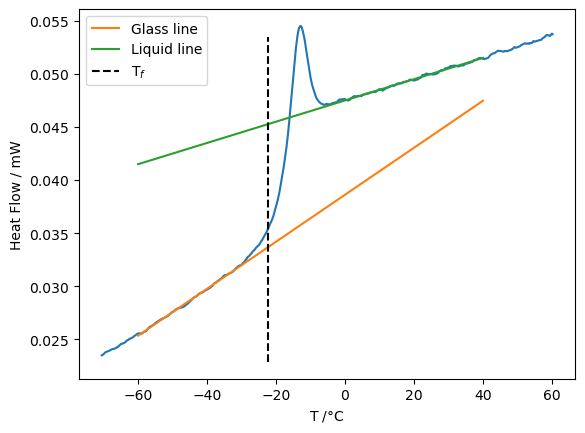

In [5]:
# compute and plot fictive temperature data
Tf_results = fictive_temperature(sample_corrected, T1, T2)

plt.plot(sample_corrected["T"], sample_corrected["dsc"])

T_slice = Tf_results["T_slice"]

plt.plot(T_slice, Tf_results["glass_line"], label="Glass line")
plt.plot(T_slice, Tf_results["liquid_line"], label="Liquid line")
plt.vlines(Tf_results["Tf"], min(sample["dsc"]), max(sample["dsc"]), color="k", linestyles="--", label="T$_f$")
plt.xlabel("T /$\degree$C")
plt.ylabel("Heat Flow / mW")
plt.legend()
plt.show()

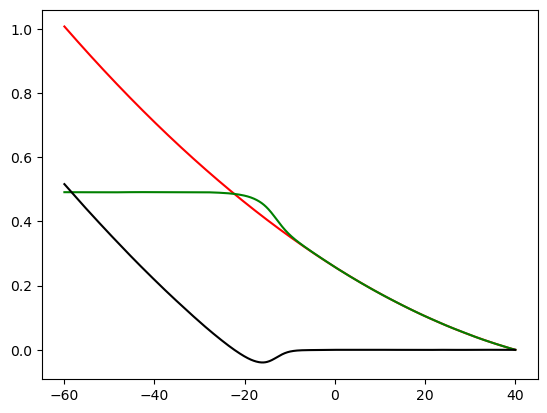

In [6]:
plt.plot(Tf_results["T_slice"], Tf_results["area_liq_minus_glass"], color="red")
plt.plot(Tf_results["T_slice"], Tf_results["area_exp_minus_glass"], color="green")
plt.plot(Tf_results["T_slice"], Tf_results["area_liq_minus_glass"]-Tf_results["area_exp_minus_glass"], color="k")

## Example: Analysis of many curves

> Note: I don´t know if there´s a reference in this data, so I won´t apply baseline correction. I also don´t have the aging times, so I don´t have something nice to plot Tf against

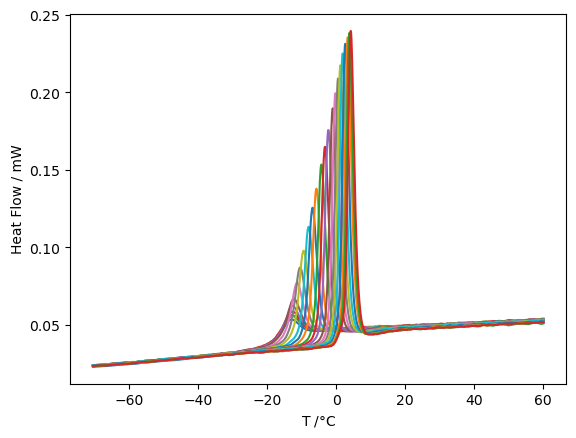

In [7]:
plt.figure()
for curve in data.values():
    plt.plot(curve["T"], curve["dsc"])
plt.xlabel("T /$\degree$C")
plt.ylabel("Heat Flow / mW")
plt.show()

In the absence of a robust, automated way to choose T1 and T2 (it´s on the to do list) I will define global ranges than can apply to all data.

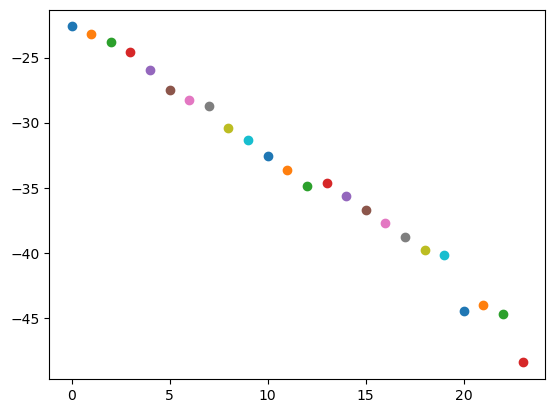

In [8]:
T1, T2 = (-60, -30), (20, 50)

plt.figure()
for i, key in enumerate(data):
    Tf_results = fictive_temperature(data[key], T1, T2)
    plt.scatter(i, Tf_results["Tf"])